In [1]:
# Grover's algorithm

from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

c:\python\python3_8_3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


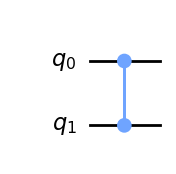

In [2]:
# This is the oracle implementation in case we want to highlight the solution "11"
oracleCircuit = QuantumCircuit(2, name="oracleCircuit")
oracleCircuit.cz(0, 1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

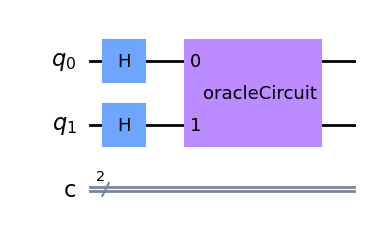

In [3]:
mainCircuit = QuantumCircuit(2, 2)
mainCircuit.h([0, 1])
mainCircuit.append(oracleCircuit, [0, 1])
mainCircuit.draw(output='mpl')

c:\python\python3_8_3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


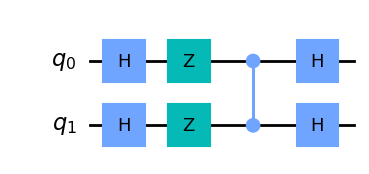

In [4]:
# Reflection gate
reflectionCircuit = QuantumCircuit(2, name="reflectionCircuit")
reflectionCircuit.h([0, 1])
reflectionCircuit.z([0, 1])
reflectionCircuit.cz(0, 1)
reflectionCircuit.h([0, 1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')


c:\python\python3_8_3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


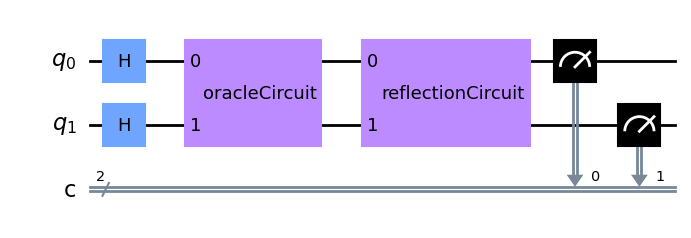

In [5]:
mainCircuit.append(reflectionCircuit, [0, 1])
mainCircuit.measure([0, 1], [0, 1])
mainCircuit.draw(output='mpl')

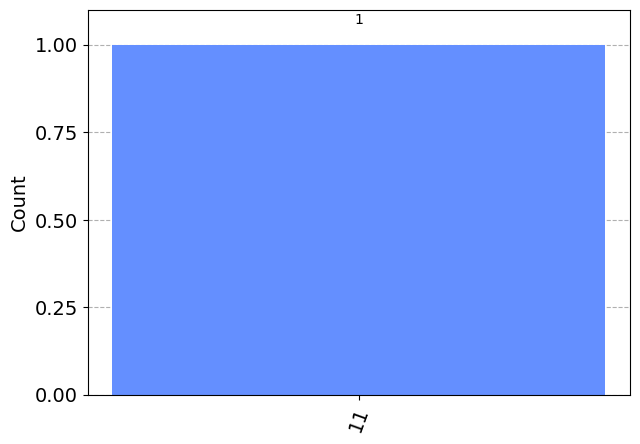

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit, backend, shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])